1. loading all the libraries
2. reading the dataset
3. select the feature(independent) and the target(dependent)
4. split the dataset into train and test
5. we will create the model and fit it with traning data
6. predict the target for test data
7. evaluate the model
8. visualize the model
9. save the model
10. load the model

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ImportError: cannot import name 'VectorPlotter' from 'seaborn._core' (c:\Users\Shambhavi\miniconda3\lib\site-packages\seaborn\_core\__init__.py)

In [2]:
automobile_data_url ='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'
df = pd.read_csv(automobile_data_url,index_col=0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# lets create a simple linear regression model on Horsepower vs Price

In [12]:
# preprocessing in this dataset is required
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

numerical_col = ['normalized-losses','wheel-base','length','width','height',
'curb-weight','engine-size','bore','stroke','compression-ratio','horsepower',
'peak-rpm','city-mpg','highway-mpg','price']

categorical_col = ['symboling','make','fuel-type','aspiration','num-of-doors','body-style',
'drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

# remove all ? from dataframe
df.replace('?', np.nan, inplace=True)

# numerical column with missing values
df[numerical_col].isnull().sum()

df[categorical_col].isnull().sum()

num_col_with_na = ['normalized-losses','bore','stroke','horsepower','peak-rpm']
cat_col_with_na = ['num-of-doors']

num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='most_frequent')

df[num_col_with_na] = num_imp.fit_transform(df[num_col_with_na])
df[cat_col_with_na] = cat_imp.fit_transform(df[cat_col_with_na])

binary_cols = ['fuel-type','aspiration','num-of-doors','engine-location']
ordinal_enc = OrdinalEncoder()

df[binary_cols]= ordinal_enc.fit_transform(df[binary_cols])

df.dropna(subset=['price'], inplace=True)
df['price']=df['price'].astype('float') # fixing the type of price column
# save it as csv
df.to_csv('clean_automobile.csv', index=None)

In [14]:
# lets create a simple linear regression model on Horsepower vs Price
dataset = df[['horsepower','price']].copy()
dataset.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


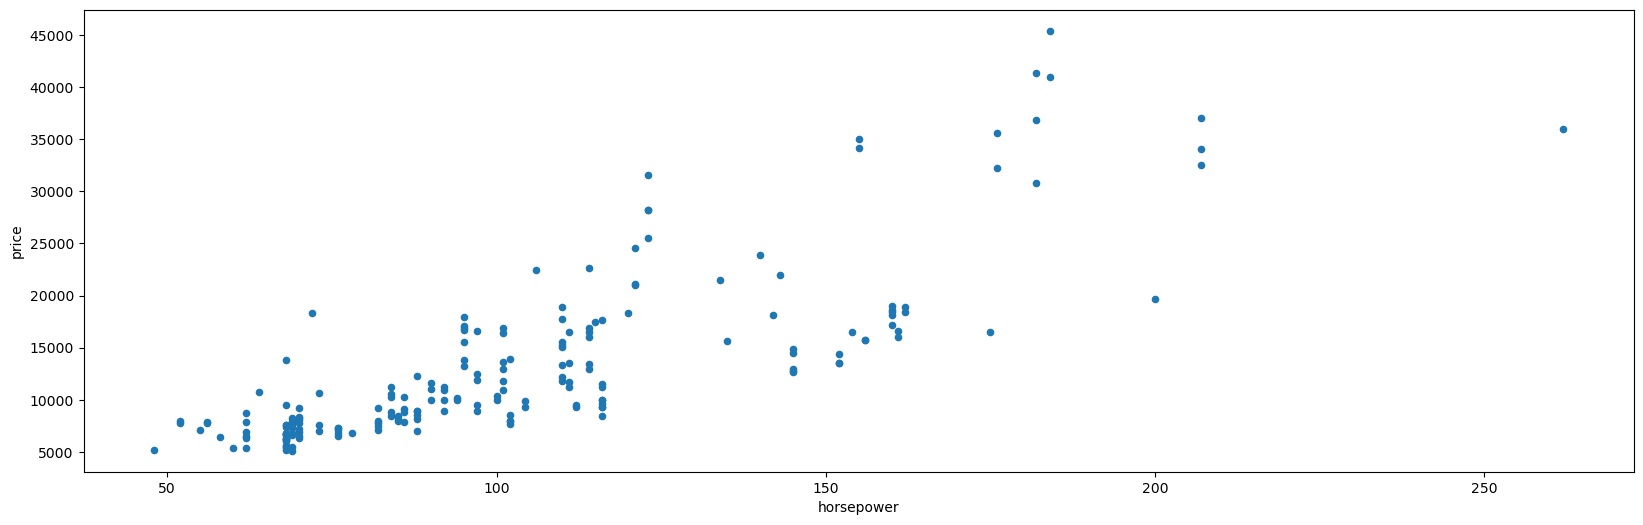

In [15]:
dataset.plot(kind='scatter', x='horsepower', y='price', figsize=(20,6))
plt.show()

In [16]:
X = dataset[['horsepower']] # taken as a 2d matrix
y = dataset['price'] # taken as a 1d matrix

In [17]:
# split the data into train and test in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'train_test_split' is not defined

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [20]:
print('intercept',reg.intercept_)
print('coef',reg.coef_)

NameError: name 'reg' is not defined

In [21]:
y_pred = reg.predict(x_test) #predict values


NameError: name 'reg' is not defined

In [22]:
r2_score(y_test, y_pred) #r2 score : higher the better

NameError: name 'r2_score' is not defined

In [23]:
mse = (mean_squared_error(y_test, y_pred)) #mean squared error : lower the better
mae = (mean_absolute_error(y_test, y_pred)) # mean absolute error : lower the better

NameError: name 'mean_squared_error' is not defined

In [24]:
print('mse',mse)
print('mae',mae)

NameError: name 'mse' is not defined

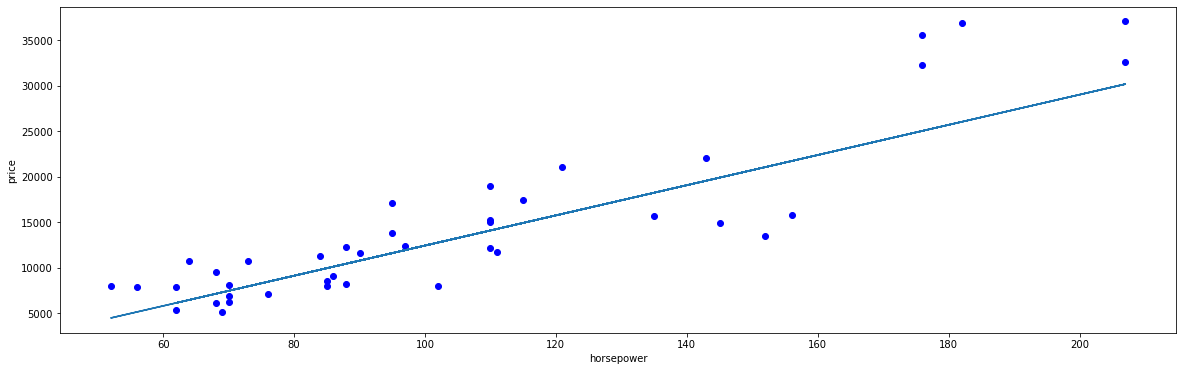

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x_test, y_test, color='blue')
ax.plot(x_test.values, y_pred)
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
plt.show()

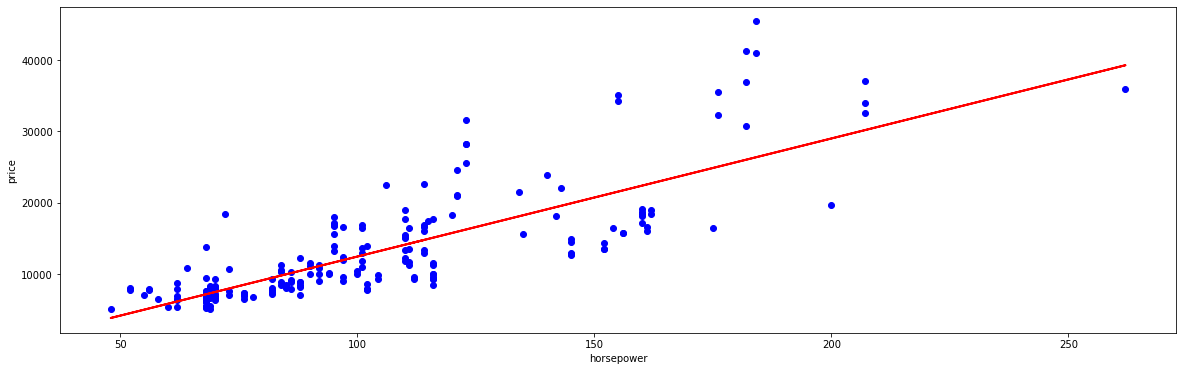

In [17]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x, y, color='blue')
ax.plot(x.values, reg.predict(x), color='red', linewidth=2)
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
plt.show()

In [18]:
price_for175 = reg.predict(np.array([[175]]))[0] #predict the price for horsepower of 175
print(price_for175)

24856.656901078124


c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
horse_power_list = [[100],[50],[150],[200]]
prices=reg.predict(np.array(horse_power_list))
print(prices)

[12438.56989505  4159.84522436 20717.29456574 28996.01923642]


c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
from joblib import dump, load

In [21]:
dump(reg, 'price_by_hp.joblib')

['price_by_hp.joblib']

In [22]:
loaded_model = load('price_by_hp.joblib')
print(loaded_model.predict(np.array([[175]])))

[24856.65690108]


c:\Users\Shambhavi\miniconda3\envs\ml12\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
